In [1]:
import sys
import os
sys.path.append("../../src")
sys.path.append("../../data")
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from IPython import display
import pylab as pl

from CorInfoMaxBSS import *
from general_utils import *
from visualization_utils import * 

import warnings
warnings.filterwarnings("ignore")

notebook_name = 'Sparse_Dictionary_Learning'

In [2]:
image_paths = '../../data/Olshaussen'
X_full_resolution = scipy.io.loadmat(os.path.join(image_paths,'IMAGES_WHITENED.mat'))['IMAGES']
X_full_resolution_shape = X_full_resolution.shape
X_patches = np.zeros((12 * 12, (X_full_resolution_shape[0] // 12) * (X_full_resolution_shape[1] // 12) * X_full_resolution_shape[2]))
counter = 0
for k in range(X_full_resolution_shape[2]):
    for i in range(512//12):
        for j in range(512//12):
            X_patches[:, counter] = X_full_resolution[i*12:(i+1)*12,j*12:(j+1)*12,k].reshape(-1,)
            counter += 1

        

In [3]:
image_paths = '../../data/Olshaussen'
X_full_resolution = scipy.io.loadmat(os.path.join(image_paths,'IMAGES_RAW.mat'))['IMAGESr']
X_full_resolution_shape = X_full_resolution.shape
X_patches = np.zeros((12 * 12, (X_full_resolution_shape[0] // 12) * (X_full_resolution_shape[1] // 12) * X_full_resolution_shape[2]))
counter = 0
for k in range(X_full_resolution_shape[2]):
    for i in range(512//12):
        for j in range(512//12):
            X_patches[:, counter] = X_full_resolution[i*12:(i+1)*12,j*12:(j+1)*12,k].reshape(-1,)
            counter += 1


In [4]:
X = X_patches.copy()

In [5]:
X.max(), X.min()

(6.438373209888596, -3.1948752300813794)

In [6]:
# INPUT_STD = 0.5
# for MixtureIndex in range(X.shape[0]):
#     stdx = np.std(X[MixtureIndex,:])
#     X[MixtureIndex,:] = X[MixtureIndex,:]/stdx*INPUT_STD

In [7]:
# X.max(), X.min()

In [8]:
lambday = 1 - 1e-1 / 100
lambdae = 1 - 1e-1 / 100
s_dim = 144
x_dim = 144

# Inverse output covariance
By = 1 * np.eye(s_dim)
# Inverse error covariance
Be = 100 * np.eye(s_dim)

debug_iteration_point = 1000
model = OnlineCorInfoMaxOlshaussen(
    s_dim=s_dim,
    x_dim=x_dim,
    muW=1e-5,
    lambday=lambday,
    lambdae=lambdae,
    By=By,
    Be=Be,
    neural_OUTPUT_COMP_TOL=1e-6,
    set_ground_truth=False,
)

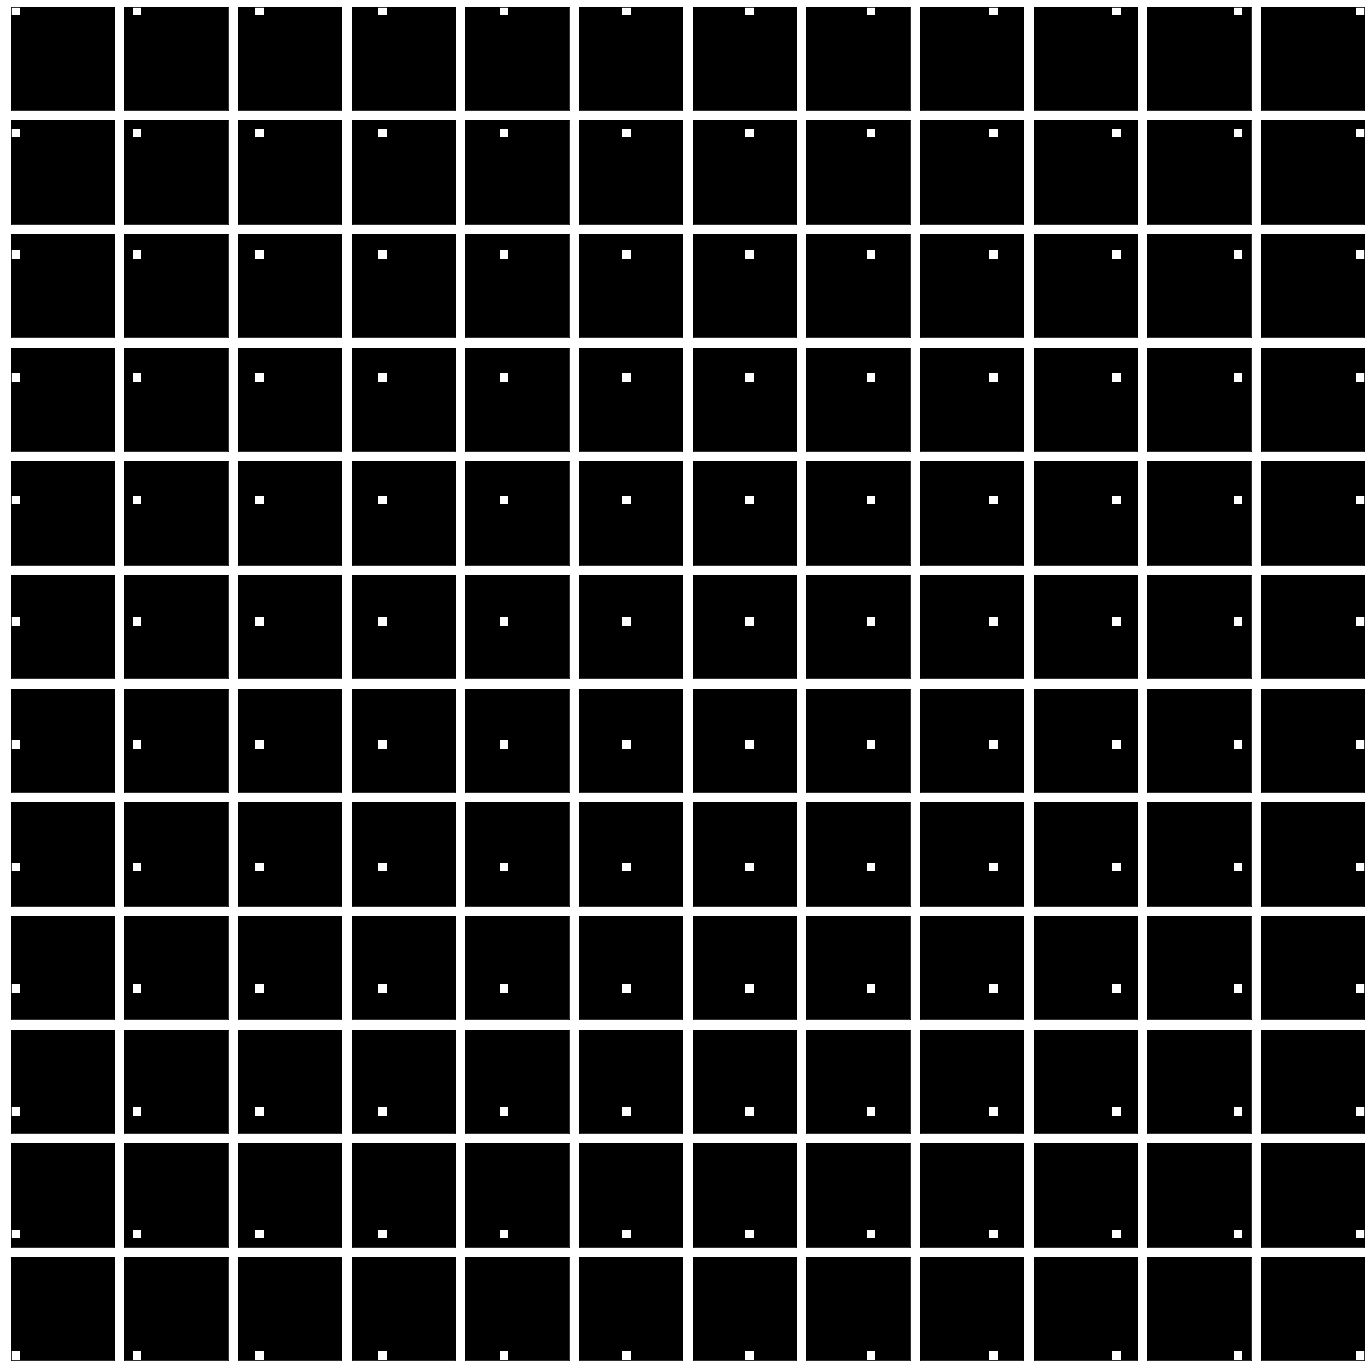

<Figure size 432x288 with 0 Axes>

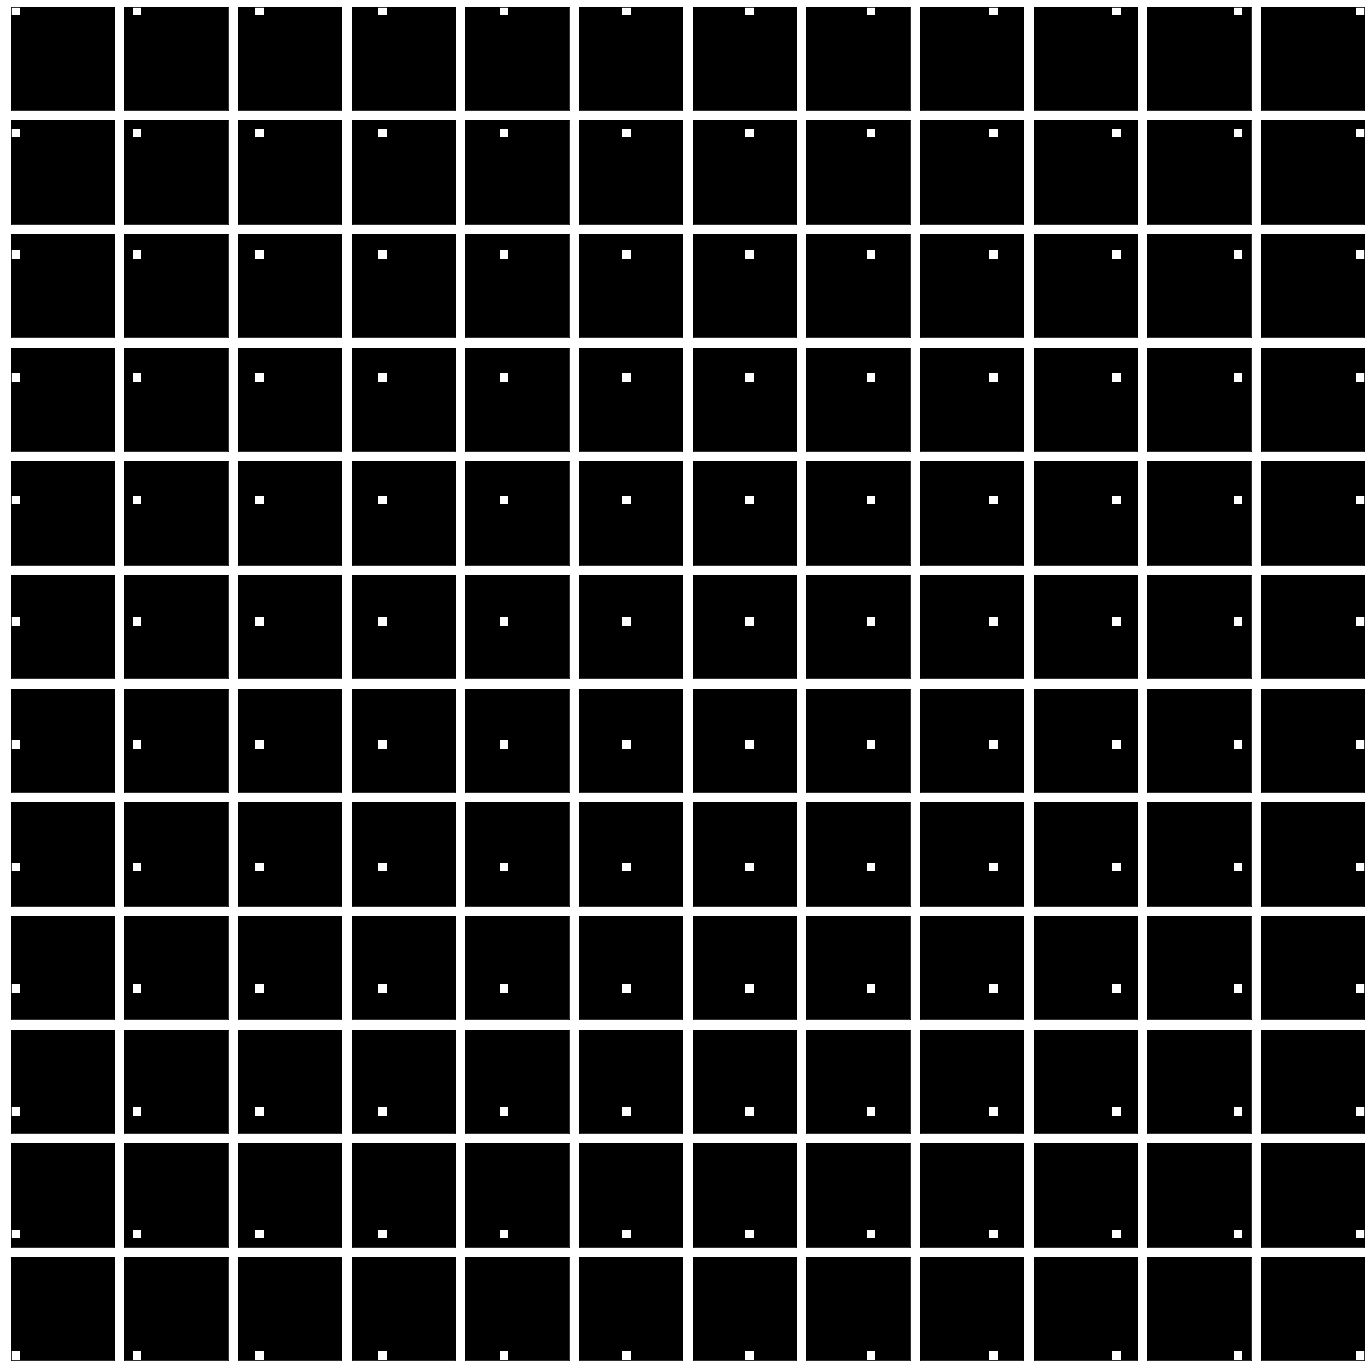

In [9]:
# Wf = model.compute_overall_mapping(return_mapping = True)
# model.plot_receptive_fields(Wf)

 96%|█████████▋| 17000/17640 [24:04<00:43, 14.61it/s]

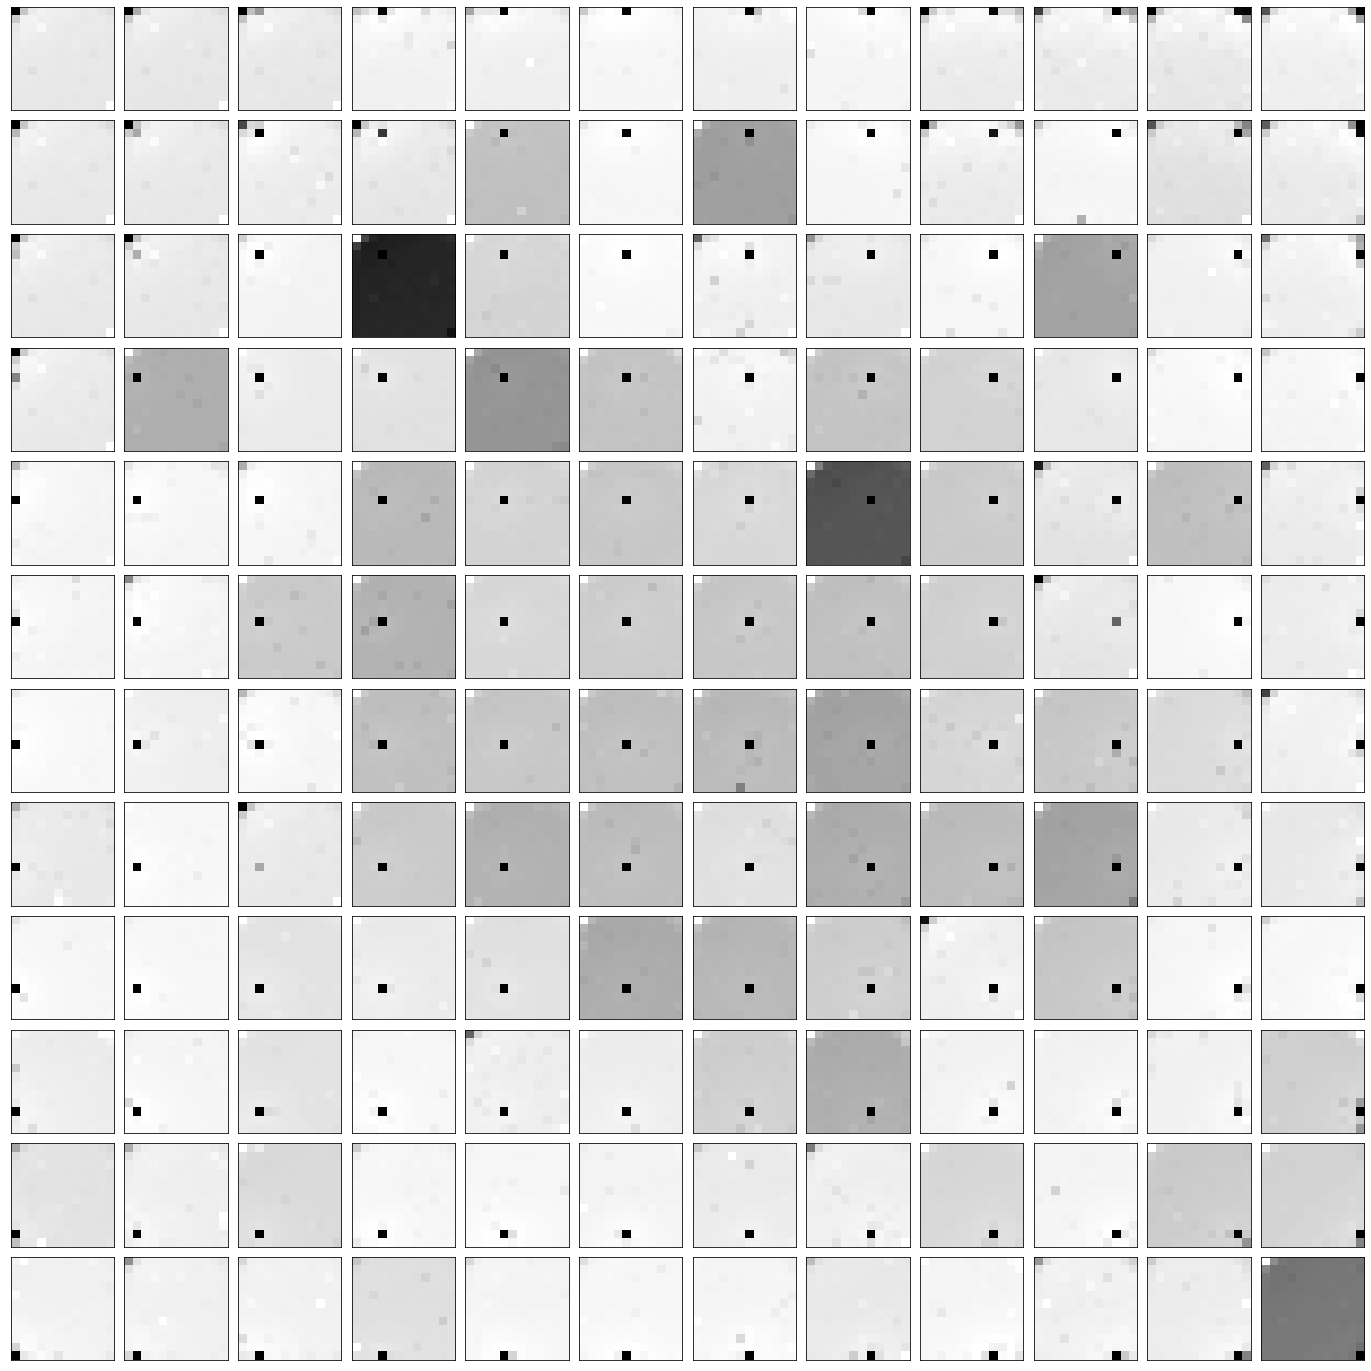

100%|█████████▉| 17604/17640 [24:37<00:01, 18.75it/s]

In [ ]:
model.fit_batch(
        X,
        n_epochs=1,
        case = "sparse", # options: 'sparse' or 'nnsparse'
        neural_dynamic_iterations=500,
        neural_lr_start=0.2,
        neural_lr_stop=1e-8,
        stlambd_lr=0.2,
        synaptic_lr_rule="constant",
        synaptic_lr_decay_divider=5000,
        neural_loop_lr_rule="divide_by_slow_loop_index",
        neural_lr_decay_multiplier=0.01,
        shuffle=True,
        debug_iteration_point=debug_iteration_point,
        plot_in_jupyter=True,
    )

In [ ]:
Wfend = model.compute_overall_mapping(return_mapping = True)
Wfend

In [ ]:
np.linalg.norm(Wfend - Wf)

In [ ]:
fig, ax = plt.subplots(12,12, figsize = (20,20))
for l in range(144):
    rf = np.reshape(-Wfend[l,:], (12,12))
    rf = ZeroOneNormalizeData(rf)
    ax[l//12, l%12].imshow(rf, cmap = 'gray')
    ax[l//12, l%12].axes.xaxis.set_visible(False)
    ax[l//12, l%12].axes.yaxis.set_visible(False)
plt.subplots_adjust( right=0.97,\
                    left=0.03,\
                    bottom=0.03,\
                    top=0.97,\
                    wspace=0.1,\
                    hspace=0.1)

In [ ]:
fig, ax = plt.subplots(12,12, figsize = (20,20))
for l in range(144):
    rf = np.reshape(-Wfend[l,:], (12,12))
    rf = ZeroOneNormalizeData(rf)
    ax[l//12, l%12].imshow(rf, cmap = 'gray')
    
plt.savefig("Sparse1.png")